In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [20]:
# Read in 2010 data set, which has a different structure than the others, and narrow to relevant rows

dfs = []

data2010_df = pd.read_csv("DataFiles/2010.csv")
data2010_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
data2010_df.head(12)

skinny_data2010 = data2010_df.loc[[0,1,3,4,58],:].reset_index()
dfs.append(skinny_data2010)

def read_clean(path,year):
    newdf = pd.read_csv(path)
    newdf.fillna(value='',axis=None,inplace=True)
    skinny_df=newdf.loc[[0,1,3,4,63],:].reset_index()
    year=skinny_df
    dfs.append(year)



In [21]:
# Read and clean datasets for 2011-2019 

read_clean("DataFiles/2011.csv",2011)
read_clean("DataFiles/2012.csv",2012)
read_clean("DataFiles/2013.csv",2013)
read_clean("DataFiles/2014.csv",2014)
read_clean("DataFiles/2015.csv",2015)
read_clean("DataFiles/2016.csv",2016)
read_clean("DataFiles/2017.csv",2017)
read_clean("DataFiles/2018.csv",2018)
read_clean("DataFiles/2019.csv",2019)

In [22]:
#Combine data for all ten years into one dataframe

combined = pd.concat(dfs, join='outer', axis=1).drop(['index'],axis=1)

# Swap columns and rows to make it easier to read and clean up index and column labels
combined_swap=combined.swapaxes("index","columns")
combined_swap = combined_swap.reset_index()
nan = float("NaN")
combined_swap.replace("", nan, inplace=True)
combined_swap.dropna(axis = 0, how ='any',inplace=True)
combined_swap = combined_swap.reset_index().drop(['level_0'], axis = 1).rename(columns={
    'index':'Demographic',
    0:'Total, 16 years and over',
    1:'Management & Professional Occupations',
    2:'Management Occupations',
    3:'Chief Executives',
    4:'Professional Occupations'})

combined_dfs = combined_swap.drop([combined_swap.index[0],combined_swap.index[7],combined_swap.index[14],combined_swap.index[21],combined_swap.index[28],combined_swap.index[35],combined_swap.index[42],combined_swap.index[49],combined_swap.index[57],combined_swap.index[65]])

# Write to a csv file so can view the whole thing outside of the notebook
combined_dfs.to_csv('DataFiles/Combined_dfs.csv',float_format='%.1f') 


In [23]:
#To permit calculations, remove commas from strings representing numbers...
combined_dfs['Total, 16 years and over']=combined_dfs['Total, 16 years and over'].str.replace(',','')
combined_dfs['Management & Professional Occupations']=combined_dfs['Management & Professional Occupations'].str.replace(',','')
combined_dfs['Management Occupations']=combined_dfs['Management Occupations'].str.replace(',','')
combined_dfs['Chief Executives']=combined_dfs['Chief Executives'].str.replace(',','')
combined_dfs['Professional Occupations']=combined_dfs['Professional Occupations'].str.replace(',','')


In [24]:
# ...and convert strings to floats
combined_dfs['Total, 16 years and over']=combined_dfs['Total, 16 years and over'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Management & Professional Occupations']=combined_dfs['Management & Professional Occupations'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Management Occupations']=combined_dfs['Management Occupations'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Chief Executives']=combined_dfs['Chief Executives'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Professional Occupations']=combined_dfs['Professional Occupations'].apply(pd.to_numeric,downcast='float', errors='ignore')


In [25]:
#Make data frames for each demographic group to make calling them into equations easier

def make_df(group):
    return combined_dfs.loc[combined_dfs['Demographic'].str.contains(group)].reset_index().drop(["index"],axis=1)

men_df= make_df("Men")
women_df = make_df("Women")
black_df = make_df("Black")
asian_df = make_df("Asian")
latinx_df = make_df("Latinx")


In [26]:
def lin_regress(dfname,column,group):
    x_values = np.array([1,2,3,4,5,6,7,8,9,10])
    y_values = dfname[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    col29 = round((slope*29+intercept),1)
    print(f"{group} slope = {slope.round(2)}, intercept = {intercept.round(2)}, rvalue = {rvalue.round(2)}, pvalue = {pvalue.round(2)}, stderr = {stderr.round(2)}, line = {line_eq}, col29 = {col29}")


In [27]:
lin_regress(women_df,"Total, 16 years and over", "Women")
lin_regress(women_df,"Chief Executives", "Women")
lin_regress(women_df,"Management Occupations", "Women")
lin_regress(women_df,"Professional Occupations", "Women")


Women slope = -0.02, intercept = 47.04, rvalue = -0.47, pvalue = 0.17, stderr = 0.01, line = y = -0.02x + 47.04, col29 = 46.5
Women slope = 0.27, intercept = 25.33, rvalue = 0.68, pvalue = 0.03, stderr = 0.1, line = y = 0.27x + 25.33, col29 = 33.0
Women slope = 0.24, intercept = 37.69, rvalue = 0.95, pvalue = 0.0, stderr = 0.03, line = y = 0.24x + 37.69, col29 = 44.5
Women slope = -0.02, intercept = 57.25, rvalue = -0.34, pvalue = 0.34, stderr = 0.02, line = y = -0.02x + 57.25, col29 = 56.7


In [28]:
lin_regress(men_df,"Total, 16 years and over", "Men")
lin_regress(men_df,"Chief Executives", "Men")
lin_regress(men_df,"Management Occupations", "Men")
lin_regress(men_df,"Professional Occupations", "Men")

Men slope = 0.02, intercept = 52.96, rvalue = 0.47, pvalue = 0.17, stderr = 0.01, line = y = 0.02x + 52.96, col29 = 53.5
Men slope = -0.27, intercept = 74.67, rvalue = -0.68, pvalue = 0.03, stderr = 0.1, line = y = -0.27x + 74.67, col29 = 67.0
Men slope = -0.24, intercept = 62.31, rvalue = -0.95, pvalue = 0.0, stderr = 0.03, line = y = -0.24x + 62.31, col29 = 55.5
Men slope = 0.02, intercept = 42.75, rvalue = 0.34, pvalue = 0.34, stderr = 0.02, line = y = 0.02x + 42.75, col29 = 43.3


In [29]:
lin_regress(asian_df,"Total, 16 years and over", "Asians")
lin_regress(asian_df,"Chief Executives", "Asians")
lin_regress(asian_df,"Management Occupations", "Asians")
lin_regress(asian_df,"Professional Occupations", "Asians")

Asians slope = 0.18, intercept = 4.73, rvalue = 0.98, pvalue = 0.0, stderr = 0.01, line = y = 0.18x + 4.73, col29 = 10.1
Asians slope = 0.3, intercept = 3.05, rvalue = 0.87, pvalue = 0.0, stderr = 0.06, line = y = 0.3x + 3.05, col29 = 11.7
Asians slope = 0.19, intercept = 4.43, rvalue = 0.94, pvalue = 0.0, stderr = 0.02, line = y = 0.19x + 4.43, col29 = 9.8
Asians slope = 0.34, intercept = 6.63, rvalue = 0.98, pvalue = 0.0, stderr = 0.03, line = y = 0.34x + 6.63, col29 = 16.6


In [30]:
lin_regress(black_df,"Total, 16 years and over", "African-Americans")
lin_regress(black_df,"Chief Executives", "African-Americans")
lin_regress(black_df,"Management Occupations", "African-Americans")
lin_regress(black_df,"Professional Occupations", "African-Americans")


African-Americans slope = 0.19, intercept = 10.51, rvalue = 0.99, pvalue = 0.0, stderr = 0.01, line = y = 0.19x + 10.51, col29 = 16.0
African-Americans slope = 0.12, intercept = 2.69, rvalue = 0.77, pvalue = 0.01, stderr = 0.04, line = y = 0.12x + 2.69, col29 = 6.2
African-Americans slope = 0.17, intercept = 6.1, rvalue = 0.94, pvalue = 0.0, stderr = 0.02, line = y = 0.17x + 6.1, col29 = 11.2
African-Americans slope = 0.17, intercept = 8.81, rvalue = 0.97, pvalue = 0.0, stderr = 0.02, line = y = 0.17x + 8.81, col29 = 13.8


In [31]:
lin_regress(latinx_df,"Total, 16 years and over", "Latinx")
lin_regress(latinx_df,"Chief Executives", "Latinx")
lin_regress(latinx_df,"Management Occupations", "Latinx")
lin_regress(latinx_df,"Professional Occupations", "Latinx")

Latinx slope = 0.37, intercept = 14.07, rvalue = 0.99, pvalue = 0.0, stderr = 0.02, line = y = 0.37x + 14.07, col29 = 24.7
Latinx slope = 0.19, intercept = 4.03, rvalue = 0.78, pvalue = 0.01, stderr = 0.05, line = y = 0.19x + 4.03, col29 = 9.5
Latinx slope = 0.34, intercept = 7.34, rvalue = 0.97, pvalue = 0.0, stderr = 0.03, line = y = 0.34x + 7.34, col29 = 17.3
Latinx slope = 0.3, intercept = 6.99, rvalue = 0.99, pvalue = 0.0, stderr = 0.02, line = y = 0.3x + 6.99, col29 = 15.5


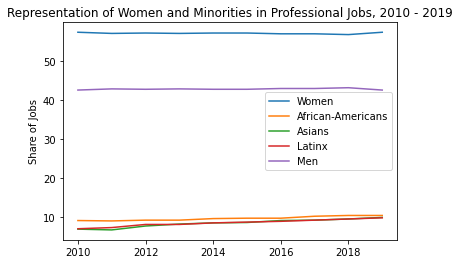

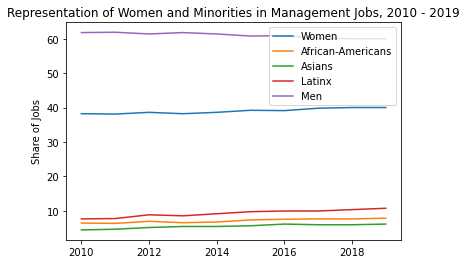

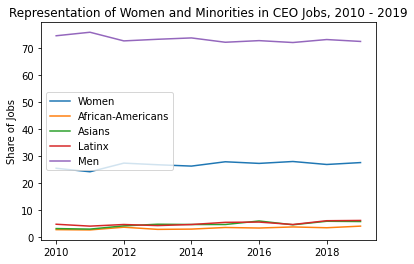

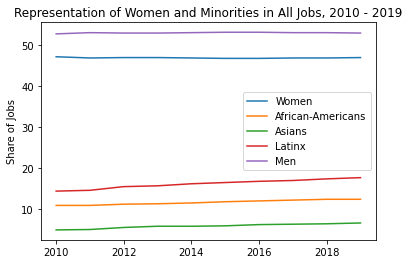

<Figure size 432x288 with 0 Axes>

In [33]:
def graph(df1,df2,df3,df4,df5,column,level):
    # line 1 points
    x1 = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
    y1 = df1[column]
    x_axis = x1
    # plotting the line 1 points 
    plt.plot(x1, y1, label = "Women")
    # line 2 points
    x2 = [2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019]
    y2 = df2[column]
    plt.plot(x2, y2, label = "African-Americans")
    x3 = [2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019]
    y3 = df3[column]
    plt.plot(x3, y3, label = "Asians")
    x4 = [2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019]
    y4 = df4[column]
    plt.plot(x4, y4, label = "Latinx")
    x5 = [2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019]
    y5 = df5[column]
    plt.plot(x5, y5, label = "Men")
        
   
    plt.ylabel('Share of Jobs')
    plt.title(f'Representation of Women and Minorities in {level} Jobs, 2010 - 2019')
    # show a legend on the plot
    plt.legend()
    # Display a figure.
    plt.savefig(f"templates/Images/{level}_ten_year_graph.png")

graph(women_df,black_df,asian_df,latinx_df,men_df,'Professional Occupations', 'Professional'  )
graph(women_df,black_df,asian_df,latinx_df,men_df,'Management Occupations', 'Management')
graph(women_df,black_df,asian_df,latinx_df,men_df,'Chief Executives', 'CEO'  )
graph(women_df,black_df,asian_df,latinx_df,men_df,'Total, 16 years and over', 'All'  )
    

In [34]:
# %Change in representation, 2010 to 2019

changeMgrs = []
changeProfs= []
changeCEOs=[]
changeTotal=[]

def change(df_name, row19,col19, row10,col10,list):
    result = (df_name.iloc[row19,col19] - df_name.iloc[row10,col10])/df_name.iloc[row10,col10]
    list.append(result.round(3))
    
change(women_df,9,3,0,3,changeMgrs)
change(women_df,9,5,0,5,changeProfs)
change(women_df,9,4,0,4,changeCEOs)
change(women_df,9,1,0,1,changeTotal)

change(black_df,9,3,0,3,changeMgrs)
change(black_df,9,5,0,5,changeProfs)
change(black_df,9,4,0,4,changeCEOs)
change(black_df,9,1,0,1,changeTotal)

change(asian_df,9,3,0,3,changeMgrs)
change(asian_df,9,5,0,5,changeProfs)
change(asian_df,9,4,0,4,changeCEOs)
change(asian_df,9,1,0,1,changeTotal)

change(latinx_df,9,3,0,3,changeMgrs)
change(latinx_df,9,5,0,5,changeProfs)
change(latinx_df,9,4,0,4,changeCEOs)
change(latinx_df,9,1,0,1,changeTotal)

change(men_df,9,3,0,3,changeMgrs)
change(men_df,9,5,0,5,changeProfs)
change(men_df,9,4,0,4,changeCEOs)
change(men_df,9,1,0,1,changeTotal)


In [36]:
# average annual change in representa ion, 2010 to 2019 = sum of yearly changes/9
ann_chg_tot = []
ann_chg_mgrs = []
ann_chg_ceos = []
ann_chg_profs = []

def avg_annual_change(list,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10):
    annual_change=((((y2-y1)/y1) + ((y3-y2)/y2) + ((y4-y3)/y3) + ((y5-y4)/y4) + ((y6-y5)/y5) + ((y7-y6)/y6) + ((y8-y7)/y7) + 
                    ((y9-y8)/y8)+((y10-y9)/y9))/9)
    list.append(annual_change)   
 
                
avg_annual_change(ann_chg_tot,women_df.iloc[0,1], women_df.iloc[1,1], women_df.iloc[2,1], women_df.iloc[3,1], women_df.iloc[4,1], 
                  women_df.iloc[5,1], women_df.iloc[6,1], women_df.iloc[7,1], women_df.iloc[8,1], women_df.iloc[9,1])
avg_annual_change(ann_chg_mgrs,women_df.iloc[0,3], women_df.iloc[1,3], women_df.iloc[2,3], women_df.iloc[3,3], women_df.iloc[4,3], 
                  women_df.iloc[5,3], women_df.iloc[6,3], women_df.iloc[7,3], women_df.iloc[8,3], women_df.iloc[9,3])
avg_annual_change(ann_chg_ceos,women_df.iloc[0,4], women_df.iloc[1,4], women_df.iloc[2,4], women_df.iloc[3,4], women_df.iloc[4,4], 
                  women_df.iloc[5,4], women_df.iloc[6,4], women_df.iloc[7,4], women_df.iloc[8,4], women_df.iloc[9,4])
avg_annual_change(ann_chg_profs,women_df.iloc[0,5], women_df.iloc[1,5], women_df.iloc[2,5], women_df.iloc[3,5], women_df.iloc[4,5], 
                  women_df.iloc[5,5], women_df.iloc[6,5], women_df.iloc[7,5], women_df.iloc[8,5], women_df.iloc[9,5])


In [37]:
avg_annual_change(ann_chg_tot,black_df.iloc[0,1], black_df.iloc[1,1], black_df.iloc[2,1], black_df.iloc[3,1], black_df.iloc[4,1], 
                  black_df.iloc[5,1], black_df.iloc[6,1], black_df.iloc[7,1], black_df.iloc[8,1], black_df.iloc[9,1])
avg_annual_change(ann_chg_mgrs,black_df.iloc[0,3], black_df.iloc[1,3], black_df.iloc[2,3], black_df.iloc[3,3], black_df.iloc[4,3], 
                  black_df.iloc[5,3], black_df.iloc[6,3], black_df.iloc[7,3], black_df.iloc[8,3], black_df.iloc[9,3])
avg_annual_change(ann_chg_ceos,black_df.iloc[0,4], black_df.iloc[1,4], black_df.iloc[2,4], black_df.iloc[3,4], black_df.iloc[4,4], 
                  black_df.iloc[5,4], black_df.iloc[6,4], black_df.iloc[7,4], black_df.iloc[8,4], black_df.iloc[9,4])
avg_annual_change(ann_chg_profs,black_df.iloc[0,5], black_df.iloc[1,5], black_df.iloc[2,5], black_df.iloc[3,5], black_df.iloc[4,5], 
                  black_df.iloc[5,5], black_df.iloc[6,5], black_df.iloc[7,5], black_df.iloc[8,5], black_df.iloc[9,5])



In [38]:
avg_annual_change(ann_chg_tot,asian_df.iloc[0,1], asian_df.iloc[1,1], asian_df.iloc[2,1], asian_df.iloc[3,1], asian_df.iloc[4,1], 
                  asian_df.iloc[5,1], asian_df.iloc[6,1], asian_df.iloc[7,1], asian_df.iloc[8,1], asian_df.iloc[9,1])
avg_annual_change(ann_chg_mgrs,asian_df.iloc[0,3], asian_df.iloc[1,3], asian_df.iloc[2,3], asian_df.iloc[3,3], asian_df.iloc[4,3], 
                  asian_df.iloc[5,3], asian_df.iloc[6,3], asian_df.iloc[7,3], asian_df.iloc[8,3], asian_df.iloc[9,3])
avg_annual_change(ann_chg_ceos,asian_df.iloc[0,4], asian_df.iloc[1,4], asian_df.iloc[2,4], asian_df.iloc[3,4], asian_df.iloc[4,4], 
                  asian_df.iloc[5,4], asian_df.iloc[6,4], asian_df.iloc[7,4], asian_df.iloc[8,4], asian_df.iloc[9,4])
avg_annual_change(ann_chg_profs,asian_df.iloc[0,5], asian_df.iloc[1,5], asian_df.iloc[2,5], asian_df.iloc[3,5], asian_df.iloc[4,5], 
                  asian_df.iloc[5,5], asian_df.iloc[6,5], asian_df.iloc[7,5], asian_df.iloc[8,5], asian_df.iloc[9,5])

In [39]:
avg_annual_change(ann_chg_tot,latinx_df.iloc[0,1], latinx_df.iloc[1,1], latinx_df.iloc[2,1], latinx_df.iloc[3,1], latinx_df.iloc[4,1], 
                  latinx_df.iloc[5,1], latinx_df.iloc[6,1], latinx_df.iloc[7,1], latinx_df.iloc[8,1], latinx_df.iloc[9,1])
avg_annual_change(ann_chg_mgrs,latinx_df.iloc[0,3], latinx_df.iloc[1,3], latinx_df.iloc[2,3], latinx_df.iloc[3,3], latinx_df.iloc[4,3], 
                  latinx_df.iloc[5,3], latinx_df.iloc[6,3], latinx_df.iloc[7,3], latinx_df.iloc[8,3], latinx_df.iloc[9,3])
avg_annual_change(ann_chg_ceos,latinx_df.iloc[0,4], latinx_df.iloc[1,4], latinx_df.iloc[2,4], latinx_df.iloc[3,4], latinx_df.iloc[4,4], 
                  latinx_df.iloc[5,4], latinx_df.iloc[6,4], latinx_df.iloc[7,4], latinx_df.iloc[8,4], latinx_df.iloc[9,4])
avg_annual_change(ann_chg_profs,latinx_df.iloc[0,5], latinx_df.iloc[1,5], latinx_df.iloc[2,5], latinx_df.iloc[3,5], latinx_df.iloc[4,5], 
                  latinx_df.iloc[5,5], latinx_df.iloc[6,5], latinx_df.iloc[7,5], latinx_df.iloc[8,5], latinx_df.iloc[9,5])

In [40]:
avg_annual_change(ann_chg_tot,men_df.iloc[0,1], men_df.iloc[1,1], men_df.iloc[2,1], men_df.iloc[3,1], men_df.iloc[4,1], 
                  men_df.iloc[5,1], men_df.iloc[6,1], men_df.iloc[7,1], men_df.iloc[8,1], men_df.iloc[9,1])
avg_annual_change(ann_chg_mgrs,men_df.iloc[0,3], men_df.iloc[1,3], men_df.iloc[2,3], men_df.iloc[3,3], men_df.iloc[4,3], 
                  men_df.iloc[5,3], men_df.iloc[6,3], men_df.iloc[7,3], men_df.iloc[8,3], men_df.iloc[9,3])
avg_annual_change(ann_chg_ceos,men_df.iloc[0,4], men_df.iloc[1,4], men_df.iloc[2,4], men_df.iloc[3,4], men_df.iloc[4,4], 
                  men_df.iloc[5,4], men_df.iloc[6,4], men_df.iloc[7,4], men_df.iloc[8,4], men_df.iloc[9,4])
avg_annual_change(ann_chg_profs,men_df.iloc[0,5], men_df.iloc[1,5], men_df.iloc[2,5], men_df.iloc[3,5], men_df.iloc[4,5], 
                  men_df.iloc[5,5], men_df.iloc[6,5], men_df.iloc[7,5], men_df.iloc[8,5], men_df.iloc[9,5])


In [41]:
groups=["Women","African-Americans","Asians","Latinx", "Men"]
columns = ["Demographics","Total","Managers","Professionals","CEOs"]
ann_change_df=pd.DataFrame(columns=columns)
ann_change_df["Total"]=ann_chg_tot
ann_change_df["Managers"]=ann_chg_mgrs
ann_change_df["Professionals"]=ann_chg_profs
ann_change_df["CEOs"]=ann_chg_ceos
ann_change_df["Demographics"]=groups



,Demographics,Total,Managers,Professionals,CEOs
0,Women,-0.000468,0.005171,0.000010,0.010267
1,African-Americans,0.014599,0.023223,0.014985,0.056388
2,Asians,0.034663,0.037823,0.041403,0.085383
3,Latinx,0.023445,0.039812,0.037996,0.038930
4,Men,0.000423,-0.003262,0.000017,-0.002998


In [42]:
women29 = ''
men29 = ''
black29 = ''
asian29 = ''
latinx29 = ''

def future_df(old_df, new_df,row):
    years=np.array(['2020','2021','2022','2023','2024','2025','2026','2027','2028','2029'])
    columns = ["Years","Total","Managers","Professionals","CEOs"]
    df=pd.DataFrame(columns=columns)
    new_df = df
    new_df["Years"]=years
    tot2019=old_df.iloc[9,1]
    mgr2019=old_df.iloc[9,3]
    ceo2019=old_df.iloc[9,4]
    prof2019=old_df.iloc[9,5]
    new_df.loc[0,"Total"]=(tot2019 + (tot2019*ann_change_df.loc[row,"Total"])).round(3)
    new_df.loc[0,"Managers"]=(mgr2019 + (mgr2019*ann_change_df.loc[row,"Managers"])).round(3)
    new_df.loc[0,"CEOs"]=(ceo2019 + (ceo2019*ann_change_df.loc[row,"CEOs"])).round(3)
    new_df.loc[0,"Professionals"]=(prof2019 + (prof2019*ann_change_df.loc[row,"Professionals"])).round(3)

    index=1
    for i in range(len(new_df)-1):
        new_df.loc[index,"Total"] = ((new_df.loc[(index -1),"Total"] + (ann_change_df.loc[row,"Total"]*new_df.loc[index-1,"Total"]))).round(3)
        new_df.loc[index,"Managers"] = ((new_df.loc[(index -1),"Managers"] + (ann_change_df.loc[row,"Managers"]*new_df.loc[index-1,"Managers"]))).round(3)
        new_df.loc[index,"CEOs"] =((new_df.loc[(index -1),"CEOs"] + (ann_change_df.loc[row,"CEOs"]*new_df.loc[index-1,"CEOs"]))).round(3)
        new_df.loc[index,"Professionals"] = ((new_df.loc[(index -1),"Professionals"] + (ann_change_df.loc[row,"Professionals"]*new_df.loc[index-1,"Professionals"]))).round(3)
        index += 1
    
    return new_df
    
women29 = future_df(women_df, women29,0)
asian29=future_df(asian_df, asian29, 2)
black29=future_df(black_df, black29, 1)
latinx29=future_df(latinx_df, latinx29, 3)
men29=future_df(men_df, men29, 4)

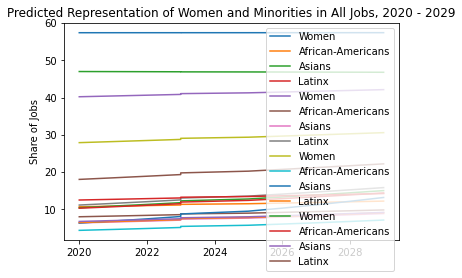

In [44]:
def graph(column,level):
    # line 1 points
    x1 = np.array([2020,2021,2022,2023,2023,2025,2026,2027,2028,2029])
    y1 = women29[column]
    x_axis = x1 
    plt.plot(x1, y1, label = "Women")
    
    x2 = [2020,2021,2022,2023,2023,2025,2026,2027,2028,2029]
    y2 = black29[column]
    plt.plot(x2, y2, label = "African-Americans")
    
    x3 = [2020,2021,2022,2023,2023,2025,2026,2027,2028,2029]
    y3 = asian29[column]
    plt.plot(x3, y3, label = "Asians")
    
    x4 = [2020,2021,2022,2023,2023,2025,2026,2027,2028,2029]
    y4 = latinx29[column]
    plt.plot(x4, y4, label = "Latinx")
        
   
    plt.ylabel('Share of Jobs')
    plt.title(f'Predicted Representation of Women and Minorities in {level} Jobs, 2020 - 2029')
    plt.legend()

    plt.savefig(f"templates/Images/{level}_ten_year_graph.png")

graph('Professionals', 'Professional'  )
graph('Managers', 'Management')
graph('CEOs', 'CEO'  )
graph('Total', 'All'  )
    

In [45]:
# Calculate advancement ratios (group's share of a job category divided by its share of total workforce)

advratio_mgrs_2010 = []
advratio_profs_2010 = []
advratio_ceos_2010 = []
groups= ["Women","African-Americans","Asians","Latinx","Men"]

def advratio (df_name, row1,col1, row2,col2,list):
    result = df_name.iloc[row1,col1]/df_name.iloc[row2,col2]
    list.append(result)    


advratio(women_df,0,3,0,1,advratio_mgrs_2010)
advratio(women_df,0,5,0,1,advratio_profs_2010)
advratio(women_df,0,4,0,1,advratio_ceos_2010)

advratio(black_df,0,3,0,1,advratio_mgrs_2010)
advratio(black_df,0,5,0,1,advratio_profs_2010)
advratio(black_df,0,4,0,1,advratio_ceos_2010)

advratio(asian_df,0,3,0,1,advratio_mgrs_2010)
advratio(asian_df,0,5,0,1,advratio_profs_2010)
advratio(asian_df,0,4,0,1,advratio_ceos_2010)

advratio(latinx_df,0,3,0,1,advratio_mgrs_2010)
advratio(latinx_df,0,5,0,1,advratio_profs_2010)
advratio(latinx_df,0,4,0,1,advratio_ceos_2010)

advratio(men_df,0,3,0,1,advratio_mgrs_2010)
advratio(men_df,0,5,0,1,advratio_profs_2010)
advratio(men_df,0,4,0,1,advratio_ceos_2010)

# Create dataframe

columns = ["Group","Mgrs","Profs","CEOs"]
index = [0,1,2,3,4]
ratio2010_df = pd.DataFrame(index=index, columns=columns)

# Populate Groups Column

ratio2010_df.iloc[0,0] = groups[0]
ratio2010_df.iloc[1,0] = groups[1]
ratio2010_df.iloc[2,0] = groups[2]
ratio2010_df.iloc[3,0] = groups[3]
ratio2010_df.iloc[4,0] = groups[4]

# Populate Women's row

ratio2010_df.iloc[0,1] = (advratio_mgrs_2010[0]*100).round(1)
ratio2010_df.iloc[0,2] = (advratio_profs_2010[0]*100).round(1)
ratio2010_df.iloc[0,3] = (advratio_ceos_2010[0]*100).round(1)

# American-Americans row

ratio2010_df.iloc[1,1] = (advratio_mgrs_2010[1]*100).round(1)
ratio2010_df.iloc[1,2] = (advratio_profs_2010[1]*100).round(1)
ratio2010_df.iloc[1,3] = (advratio_ceos_2010[1]*100).round(1)

# Asians

ratio2010_df.iloc[2,1] = (advratio_mgrs_2010[2]*100).round(1)
ratio2010_df.iloc[2,2] = (advratio_profs_2010[2]*100).round(1)
ratio2010_df.iloc[2,3] = (advratio_ceos_2010[2]*100).round(1)

# Latinx
ratio2010_df.iloc[3,1] = (advratio_mgrs_2010[3]*100).round(1)
ratio2010_df.iloc[3,2] = (advratio_profs_2010[3]*100).round(1)
ratio2010_df.iloc[3,3] = (advratio_ceos_2010[3]*100).round(1)

# Men

ratio2010_df.iloc[4,1] = (advratio_mgrs_2010[4]*100).round(1)
ratio2010_df.iloc[4,2] = (advratio_profs_2010[4]*100).round(1)
ratio2010_df.iloc[4,3] = (advratio_ceos_2010[4]*100).round(1)

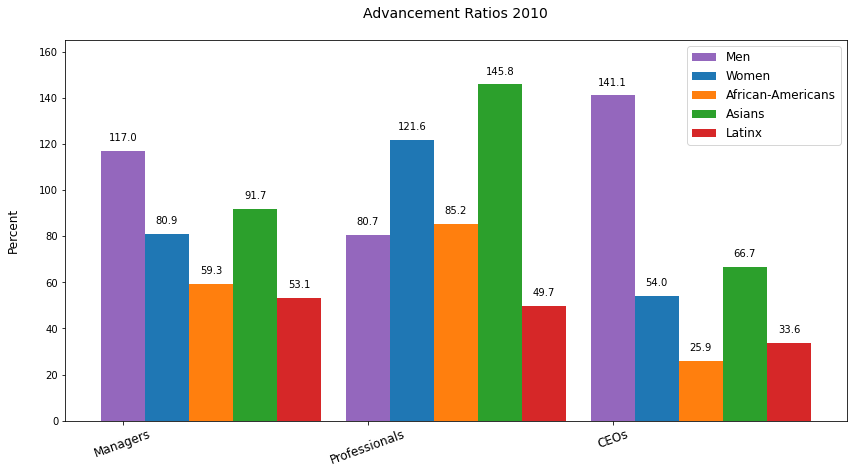

In [46]:
# Advancement Ratio Charts, 2010

demographics = ["Men","Women","African-Americans","Asians","Latinx"]

X = np.arange(3)
plt.figure(figsize=(14,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","Professionals","CEOs"],fontsize=12)
plt.bar(X + 0.00, ratio2010_df.iloc[4,1:4], color = 'tab:purple',width = 0.18, align="center")
for x,y in zip(X + 0.00,ratio2010_df.iloc[4,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.18, ratio2010_df.iloc[0,1:4], color = 'tab:blue', width = 0.18,align="center")
for x,y in zip(X + 0.18,ratio2010_df.iloc[0,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.36, ratio2010_df.iloc[1,1:4], color = 'tab:orange', width = 0.18,align="center")
for x,y in zip(X + 0.36,ratio2010_df.iloc[1,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.54, ratio2010_df.iloc[2,1:4], color = 'tab:green', width = 0.18,align="center")
for x,y in zip(X + 0.54,ratio2010_df.iloc[2,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
               
plt.bar(X + 0.72, ratio2010_df.iloc[3,1:4], color = 'tab:red', width = 0.18,align="center")
for x,y in zip(X + 0.72,ratio2010_df.iloc[3,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.title("Advancement Ratios 2010\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,165)

plt.savefig("templates/Images/bar_advratio2010")


In [47]:
# Advancement ratio charts, 2019

advratio_mgrs_2019= []
advratio_profs_2019 = []
advratio_ceos_2019 = []
groups= ["Women","African-Americans","Asians","Latinx","Men"]

def advratio (df_name, row1,col1, row2,col2,list):
    result = df_name.iloc[row1,col1]/df_name.iloc[row2,col2]
    list.append(result)    


advratio(women_df,9,3,9,1,advratio_mgrs_2019)
advratio(women_df,9,5,9,1,advratio_profs_2019)
advratio(women_df,9,4,9,1,advratio_ceos_2019)

advratio(black_df,9,3,9,1,advratio_mgrs_2019)
advratio(black_df,9,5,9,1,advratio_profs_2019)
advratio(black_df,9,4,9,1,advratio_ceos_2019)

advratio(asian_df,9,3,9,1,advratio_mgrs_2019)
advratio(asian_df,9,5,9,1,advratio_profs_2019)
advratio(asian_df,9,4,9,1,advratio_ceos_2019)

advratio(latinx_df,9,3,9,1,advratio_mgrs_2019)
advratio(latinx_df,9,5,9,1,advratio_profs_2019)
advratio(latinx_df,9,4,9,1,advratio_ceos_2019)

advratio(men_df,9,3,9,1,advratio_mgrs_2019)
advratio(men_df,9,5,9,1,advratio_profs_2019)
advratio(men_df,9,4,9,1,advratio_ceos_2019)

# Create dataframe

columns = ["Group","Mgrs","Profs","CEOs"]
index = [0,1,2,3,4]
ratio2019_df = pd.DataFrame(index=index, columns=columns)

# Populate Groups Column

ratio2019_df.iloc[0,0] = groups[0]
ratio2019_df.iloc[1,0] = groups[1]
ratio2019_df.iloc[2,0] = groups[2]
ratio2019_df.iloc[3,0] = groups[3]
ratio2019_df.iloc[4,0] = groups[4]

# Populate Women's row

ratio2019_df.iloc[0,1] = (advratio_mgrs_2019[0]*100).round(1)
ratio2019_df.iloc[0,2] = (advratio_profs_2019[0]*100).round(1)
ratio2019_df.iloc[0,3] = (advratio_ceos_2019[0]*100).round(1)

# American-Americans row

ratio2019_df.iloc[1,1] = (advratio_mgrs_2019[1]*100).round(1)
ratio2019_df.iloc[1,2] = (advratio_profs_2019[1]*100).round(1)
ratio2019_df.iloc[1,3] = (advratio_ceos_2019[1]*100).round(1)

# Asians

ratio2019_df.iloc[2,1] = (advratio_mgrs_2019[2]*100).round(1)
ratio2019_df.iloc[2,2] = (advratio_profs_2019[2]*100).round(1)
ratio2019_df.iloc[2,3] = (advratio_ceos_2019[2]*100).round(1)

# Latinx
ratio2019_df.iloc[3,1] = (advratio_mgrs_2019[3]*100).round(1)
ratio2019_df.iloc[3,2] = (advratio_profs_2019[3]*100).round(1)
ratio2019_df.iloc[3,3] = (advratio_ceos_2019[3]*100).round(1)

# Men

ratio2019_df.iloc[4,1] = (advratio_mgrs_2019[4]*100).round(1)
ratio2019_df.iloc[4,2] = (advratio_profs_2019[4]*100).round(1)
ratio2019_df.iloc[4,3] = (advratio_ceos_2019[4]*100).round(1)

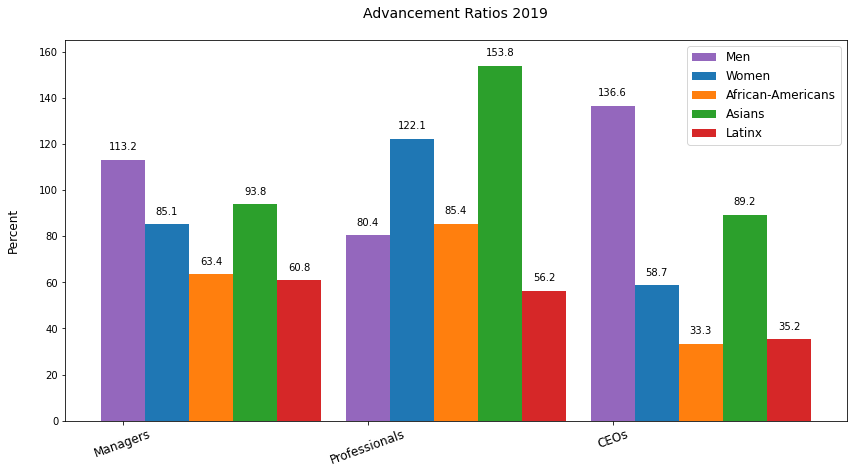

In [48]:
# advancement ratio chart, 2019

demographics = ["Men","Women","African-Americans","Asians","Latinx"]

X = np.arange(3)
plt.figure(figsize=(14,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","Professionals","CEOs"],fontsize=12)
plt.bar(X + 0.00, ratio2019_df.iloc[4,1:4], color = 'tab:purple', width = 0.18, align="center")
for x,y in zip(X + 0.00,ratio2019_df.iloc[4,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.18, ratio2019_df.iloc[0,1:4], color = 'tab:blue', width = 0.18,align="center")
for x,y in zip(X + 0.18,ratio2019_df.iloc[0,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.36, ratio2019_df.iloc[1,1:4], color = 'tab:orange', width = 0.18,align="center")
for x,y in zip(X + 0.36,ratio2019_df.iloc[1,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.54, ratio2019_df.iloc[2,1:4], color = 'tab:green', width = 0.18,align="center")
for x,y in zip(X + 0.54,ratio2019_df.iloc[2,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
               
plt.bar(X + 0.72, ratio2019_df.iloc[3,1:4], color = 'tab:red', width = 0.18,align="center")
for x,y in zip(X + 0.72,ratio2019_df.iloc[3,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.title("Advancement Ratios 2019\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,165)

plt.savefig("templates/Images/bar_advratio2019")


In [49]:
advratio_mgrs_2029 = []
advratio_profs_2029 = []
advratio_ceos_2029 = []
groups= ["Women","African-Americans","Asians","Latinx","Men"]

def advratio (df_name, row1,col1, row2,col2,list):
    result = df_name.iloc[row1,col1]/df_name.iloc[row2,col2]
    list.append(result)    


advratio(women29,9,2,9,1,advratio_mgrs_2029)
advratio(women29,9,3,9,1,advratio_profs_2029)
advratio(women29,9,4,9,1,advratio_ceos_2029)

advratio(black29,9,2,9,1,advratio_mgrs_2029)
advratio(black29,9,3,9,1,advratio_profs_2029)
advratio(black29,9,4,9,1,advratio_ceos_2029)

advratio(asian29,9,2,9,1,advratio_mgrs_2029)
advratio(asian29,9,3,9,1,advratio_profs_2029)
advratio(asian29,9,4,9,1,advratio_ceos_2029)

advratio(latinx29,9,2,9,1,advratio_mgrs_2029)
advratio(latinx29,9,2,9,1,advratio_profs_2029)
advratio(latinx29,9,4,9,1,advratio_ceos_2029)

advratio(men29,9,2,9,1,advratio_mgrs_2029)
advratio(men29,9,3,9,1,advratio_profs_2029)
advratio(men29,9,4,9,1,advratio_ceos_2029)



In [50]:
# Create dataframe

columns = ["Group","Mgrs","Profs","CEOs"]
index = [0,1,2,3,4]
ratio2029_df = pd.DataFrame(index=index, columns=columns)

# Populate Groups Column

ratio2029_df.iloc[0,0] = groups[0]
ratio2029_df.iloc[1,0] = groups[1]
ratio2029_df.iloc[2,0] = groups[2]
ratio2029_df.iloc[3,0] = groups[3]
ratio2029_df.iloc[4,0] = groups[4]

# Populate Women's row

ratio2029_df.iloc[0,1] = (advratio_mgrs_2029[0]*100).round(1)
ratio2029_df.iloc[0,2] = (advratio_profs_2029[0]*100).round(1)
ratio2029_df.iloc[0,3] = (advratio_ceos_2029[0]*100).round(1)

# American-Americans row

ratio2029_df.iloc[1,1] = (advratio_mgrs_2029[1]*100).round(1)
ratio2029_df.iloc[1,2] = (advratio_profs_2029[1]*100).round(1)
ratio2029_df.iloc[1,3] = (advratio_ceos_2029[1]*100).round(1)

# Asians

ratio2029_df.iloc[2,1] = (advratio_mgrs_2029[2]*100).round(1)
ratio2029_df.iloc[2,2] = (advratio_profs_2029[2]*100).round(1)
ratio2029_df.iloc[2,3] = (advratio_ceos_2029[2]*100).round(1)

# Latinx
ratio2029_df.iloc[3,1] = (advratio_mgrs_2029[3]*100).round(1)
ratio2029_df.iloc[3,2] = (advratio_profs_2029[3]*100).round(1)
ratio2029_df.iloc[3,3] = (advratio_ceos_2029[3]*100).round(1)

# Men

ratio2029_df.iloc[4,1] = (advratio_mgrs_2029[4]*100).round(1)
ratio2029_df.iloc[4,2] = (advratio_profs_2029[4]*100).round(1)
ratio2029_df.iloc[4,3] = (advratio_ceos_2029[4]*100).round(1)

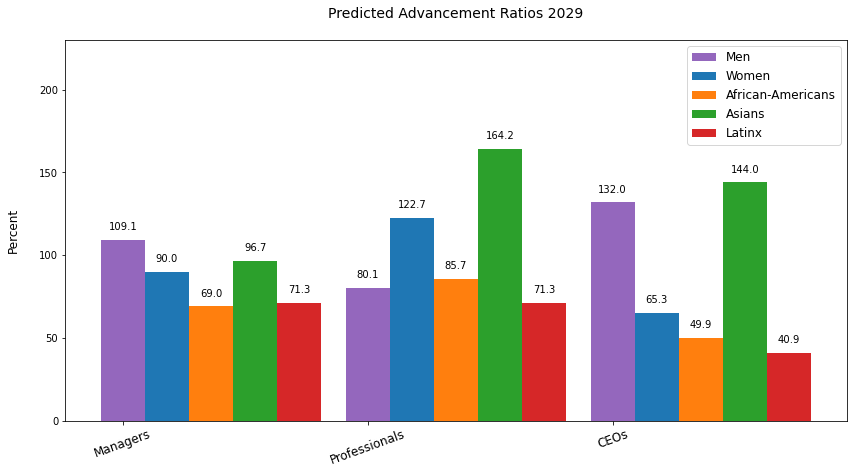

In [51]:
# advancement ratio chart, 2029

demographics = ["Men","Women","African-Americans","Asians","Latinx"]

X = np.arange(3)
plt.figure(figsize=(14,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","Professionals","CEOs"],fontsize=12)
plt.bar(X + 0.00, ratio2029_df.iloc[4,1:4], color = 'tab:purple', width = 0.18, align="center")
for x,y in zip(X + 0.00,ratio2029_df.iloc[4,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.18, ratio2029_df.iloc[0,1:4], color = 'tab:blue', width = 0.18,align="center")
for x,y in zip(X + 0.18,ratio2029_df.iloc[0,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.36, ratio2029_df.iloc[1,1:4], color = 'tab:orange', width = 0.18,align="center")
for x,y in zip(X + 0.36,ratio2029_df.iloc[1,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.54, ratio2029_df.iloc[2,1:4], color = 'tab:green', width = 0.18,align="center")
for x,y in zip(X + 0.54,ratio2029_df.iloc[2,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
               
plt.bar(X + 0.72, ratio2029_df.iloc[3,1:4], color = 'tab:red', width = 0.18,align="center")
for x,y in zip(X + 0.72,ratio2029_df.iloc[3,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.title("Predicted Advancement Ratios 2029\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,230)

plt.savefig("templates/Images/bar_advratio2029")



In [52]:
# figure predictedD (predicted delta in ratio 2010 v 2029)

D29_mgrs = []
D29_profs = []
D29_ceos = []
    
index = 0
for i in range(len(ratio2029_df)):
    deltaM = (ratio2029_df.iloc[index,1] - ratio2019_df.iloc[index,1])/ratio2019_df.iloc[index,1]
    D29_mgrs.append((deltaM*100).round(1))
    deltaP = (ratio2029_df.iloc[index,2] - ratio2019_df.iloc[index,2])/ratio2019_df.iloc[index,2]
    D29_profs.append((deltaP*100).round(1))
    deltaC = (ratio2029_df.iloc[index,3] - ratio2019_df.iloc[index,3])/ratio2019_df.iloc[index,3]
    D29_ceos.append((deltaC*100).round(1))
    index +=1

groups=["Women","African-Americans","Asians","Latinx", "Men"]
columns = ["Demographics","Managers","Professionals","CEOs"]
predictedD = pd.DataFrame(columns = columns)

predictedD["Managers"]=D29_mgrs
predictedD["Professionals"]=D29_profs
predictedD["CEOs"]=D29_ceos
predictedD["Demographics"]=groups
predictedD.head()

,Demographics,Managers,Professionals,CEOs
0,Women,5.8,0.5,11.2
1,African-Americans,8.8,0.4,49.8
2,Asians,3.1,6.8,61.4
3,Latinx,17.3,26.9,16.2
4,Men,-3.6,-0.4,-3.4


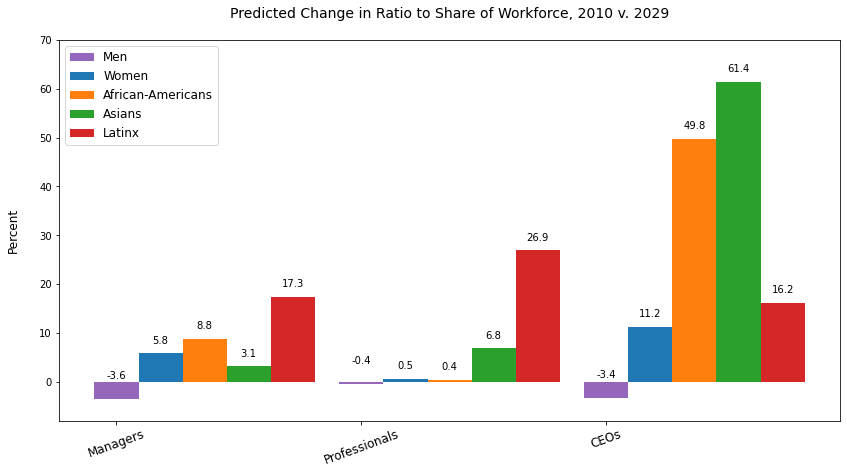

In [53]:
demographics = ["Men","Women","African-Americans","Asians","Latinx"]

X = np.arange(3)
plt.figure(figsize=(14,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","Professionals","CEOs"],fontsize=12)
plt.bar(X + 0.00, predictedD.iloc[4,1:4], color = 'tab:purple', width = 0.18, align="center")
for x,y in zip(X + 0.00,predictedD.iloc[4,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,20), 
                 ha='center')

plt.bar(X + 0.18, predictedD.iloc[0,1:4], color = 'tab:blue', width = 0.18,align="center")
for x,y in zip(X + 0.18,predictedD.iloc[0,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.bar(X + 0.36, predictedD.iloc[1,1:4], color = 'tab:orange', width = 0.18,align="center")
for x,y in zip(X + 0.36,predictedD.iloc[1,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.bar(X + 0.54, predictedD.iloc[2,1:4], color = 'tab:green', width = 0.18,align="center")
for x,y in zip(X + 0.54,predictedD.iloc[2,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
               
plt.bar(X + 0.72, predictedD.iloc[3,1:4], color = 'tab:red', width = 0.18,align="center")
for x,y in zip(X + 0.72,predictedD.iloc[3,1:4]):
    label = "{:.1f}".format(y)
    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')
    
plt.title("Predicted Change in Ratio to Share of Workforce, 2010 v. 2029\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(-8,70)
plt.savefig("templates/Images/bar_ratiochange_2029")


In [55]:
groups = ["Women","Black","Asian","Latinx","Men"]
women20yr=''
black20yr=''
asian20yr=''
latinx20yr=''
men20yr=''

def make_df20yr(df1, df2,newdf, group):
    df1=df1.drop(columns=["Management & Professional Occupations"],axis=1).rename(columns={"Demographic":"Demographics","Total, 16 years and over":"Total","Management Occupations":
                                  "Managers", "Chief Executives":"CEOs","Professional Occupations":"Professionals"})
    df1=df1[["Demographics", "Total", "Managers","Professionals","CEOs"]]
    df2=df2.rename(columns={"Years":"Year"})
    new_df = pd.concat([df1,df2]).reset_index().drop(columns=["index"],axis=1)
    year  = 2009
    index  = 0
    for row in range(len(new_df)):
        new_df.loc[index,"Year"] = year+1
        new_df.loc[index,"Demographics"]=group       
        index +=1
        year +=1
    
    return new_df
    
women20yr = make_df20yr(women_df,women29,women20yr,groups[0])
black20yr = make_df20yr(black_df,black29,black20yr,groups[1])
asian20yr = make_df20yr(asian_df,asian29,asian20yr, groups[2])
latinx20yr = make_df20yr(latinx_df,latinx29,latinx20yr,groups[3])
men20yr = make_df20yr(men_df,men29,men20yr,groups[4])


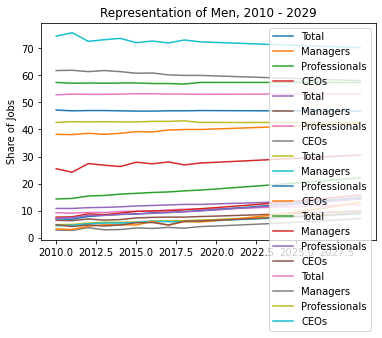

In [57]:
def by_group_graph(df,group):
    # line 1 points
    x1 = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029])
    y1 = df["Total"]
    x_axis = x1
    # plotting the line 1 points 
    plt.plot(x1, y1, label = "Total")
    # line 2 points
    x2 = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029])
    y2 = df["Managers"]
    plt.plot(x2, y2, label = "Managers")
    x3 = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029])
    y3 = df["Professionals"]
    plt.plot(x3, y3, label = "Professionals")
    x4 = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029])
    y4 = df["CEOs"]
    plt.plot(x4, y4, label = "CEOs")
   
        
   
    plt.ylabel('Share of Jobs')
    plt.title(f'Representation of {group}, 2010 - 2029')
    # show a legend on the plot
    plt.legend()
    # Display a figure
    plt.savefig(f"templates/Images/{group}_twenty_year_graph.png")

by_group_graph(women20yr,"Women")
by_group_graph(black20yr,"African-Americans")
by_group_graph(asian20yr,"Asians")
by_group_graph(latinx20yr,"Latinx")
by_group_graph(men20yr,"Men")